In [1]:
import sys,os
sys.path.append('../')
from deep_rl import *
import matplotlib.pyplot as plt

import torch
# torch.set_default_tensor_type('torch.cuda.FloatTensor')
from tqdm import trange, tqdm
import random
import numpy as np
select_device(0)
# torch.multiprocessing.set_start_method("spawn", force=False)
%load_ext autoreload
%reload_ext autoreload
%autoreload 2

In [6]:
### First Get the phi model

import sys
sys.path.append('../')
sys.path.append('../state_dict')
sys.path.append('../dpc')
from model_3d import *
# import d4rl_atari
import gym
import deep_rl
from deep_rl import *

num_seq = 6
seq_len = 4
net = 'resnet18'
pred_step = 1

model_state_dict = torch.load(f'../state_dict/{num_seq}-{seq_len}-{net}-{pred_step}.pt')

model = DPC_RNN(sample_size=84, 
                        num_seq=num_seq,
                        seq_len=seq_len, 
                        network=net, 
                        pred_step=pred_step)

model.load_state_dict(model_state_dict)

Using DPC-RNN model
final feature map has size 3x3


<All keys matched successfully>

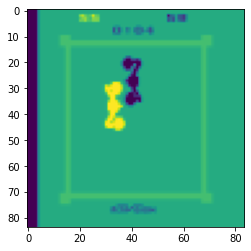

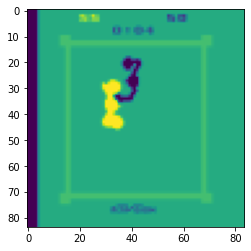

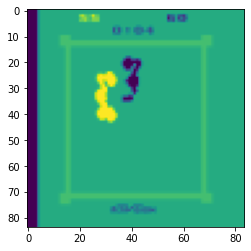

In [20]:
# check if the dataset is proper

import matplotlib.pyplot as plt

obs = dataset['observations']


plt.figure()
plt.imshow(obs[0].reshape((84, 84)))

plt.figure()
plt.imshow(obs[1].reshape((84, 84)))

plt.figure()
plt.imshow(obs[2].reshape((84, 84)))

In [5]:
task = Task('BoxingNoFrameskip-v0')
# from deep_rl.component.envs import make_env
# make_env('BoxingNoFrameskip-v0', 0, 0)()
task.reset()[0].__array__().shape

starting making env
wrapped with deepmind wrapper
(84, 84, 1)
<class 'numpy.ndarray'>


(4, 84, 84)

In [ ]:
### Need an observation wrapper on env (to add channels to the env observation)


In [2]:
from deep_rl import *

# def dqn_pixel(**kwargs):
#     generate_tag(kwargs)
#     kwargs.setdefault('log_level', 0)
#     config = Config()
#     config.merge(kwargs)

#     config.task_fn = lambda: Task(config.game)
#     config.eval_env = config.task_fn()

#     config.optimizer_fn = lambda params: torch.optim.RMSprop(
#         params, lr=0.00025, alpha=0.95, eps=0.01, centered=True)
#     config.network_fn = lambda: VanillaNet(config.action_dim, NatureConvBody(in_channels=config.history_length))
#     # config.network_fn = lambda: DuelingNet(config.action_dim, NatureConvBody(in_channels=config.history_length))
#     config.random_action_prob = LinearSchedule(1.0, 0.01, 1e6)

#     # config.replay_fn = lambda: Replay(memory_size=int(1e6), batch_size=32)
#     config.replay_fn = lambda: AsyncReplay(memory_size=int(1e6), batch_size=32)

#     config.batch_size = 32
#     config.state_normalizer = ImageNormalizer()
#     config.reward_normalizer = SignNormalizer()
#     config.discount = 0.99
#     config.target_network_update_freq = 10000
#     config.exploration_steps = 50000
#     config.sgd_update_frequency = 4
#     config.gradient_clip = 5
#     config.history_length = 4
#     # config.double_q = True
#     config.double_q = False
#     config.max_steps = int(2e7)
#     run_steps(DQNAgent(config))
    
def dqn_pixel(**kwargs):
    generate_tag(kwargs)
    kwargs.setdefault('log_level', 0)
    config = Config()
    
    print(config.DEVICE)
    config.merge(kwargs)
    config.num_workers = 0
#     config.num_worker = 0

    config.task_fn = lambda: Task(config.game)
    config.eval_env = config.task_fn()

    config.optimizer_fn = lambda params: torch.optim.RMSprop(
        params, lr=0.00025, alpha=0.95, eps=0.01, centered=True)
    config.network_fn = lambda: VanillaNet(config.action_dim, NatureConvBody(in_channels=config.history_length))
    # config.network_fn = lambda: DuelingNet(config.action_dim, NatureConvBody(in_channels=config.history_length))
    config.random_action_prob = LinearSchedule(1.0, 0.01, 1e6)

    # config.replay_fn = lambda: Replay(memory_size=int(1e6), batch_size=32)
    config.replay_fn = lambda: AsyncReplay(memory_size=int(1e6), batch_size=32)

    config.batch_size = 32
    config.state_normalizer = ImageNormalizer()
    config.reward_normalizer = SignNormalizer()
    config.discount = 0.99
    config.target_network_update_freq = 10000
    config.exploration_steps = 50000
    config.sgd_update_frequency = 4
    config.gradient_clip = 5
    config.history_length = 4
    config.eval_interval = int(5e4)
    # config.double_q = True
    config.double_q = False
    config.max_steps = int(1e6)
    
    print(config)
    run_steps(DQNAgent(config))
#     agent = DQNAgent(config)
    
#     print('finish constructing agent')
#     #run_steps function below
#     agent_name = agent.__class__.__name__
#     while True:
#         if config.save_interval and not agent.total_steps % config.save_interval:
#             agent.save('data/%s-%s-%d' % (agent_name, config.tag, agent.total_steps))
#         if config.log_interval and not agent.total_steps % config.log_interval:
#             t0 = time.time()
#         if config.eval_interval and not agent.total_steps % config.eval_interval:
#             agent.eval_episodes()
#             pass
#         if config.max_steps and agent.total_steps >= config.max_steps:
#             return agent
#             break
#         agent.step()
#         agent.switch_task()
#     return agent

In [2]:
task = Task('BoxingNoFrameskip-v0')

starting making env


In [3]:
task.env.envs[0]

<FrameStack<TransposeImage<WarpFrame<FireResetEnv<EpisodicLifeEnv<OriginalReturnWrapper<MaxAndSkipEnv<NoopResetEnv<TimeLimit<AtariEnv<BoxingNoFrameskip-v0>>>>>>>>>>>

In [3]:
dqn = dqn_pixel(game='BreakoutNoFrameskip-v0')

cuda:0
starting making env
starting making env


2021-06-19 16:26:56,807 - root - INFO: steps 0, 161319384.62 steps/s
2021-06-19 16:26:59,222 - root - INFO: steps 0, episodic_return_test 1.60(0.92)
2021-06-19 16:27:00,786 - root - INFO: steps 1000, 251.38 steps/s
2021-06-19 16:27:01,997 - root - INFO: steps 2000, 826.63 steps/s
2021-06-19 16:27:03,215 - root - INFO: steps 3000, 821.25 steps/s
2021-06-19 16:27:04,416 - root - INFO: steps 4000, 833.25 steps/s
2021-06-19 16:27:05,607 - root - INFO: steps 5000, 839.44 steps/s
2021-06-19 16:27:06,805 - root - INFO: steps 6000, 835.61 steps/s
2021-06-19 16:27:08,020 - root - INFO: steps 7000, 823.17 steps/s
2021-06-19 16:27:09,249 - root - INFO: steps 8000, 814.24 steps/s
2021-06-19 16:27:10,435 - root - INFO: steps 9000, 843.34 steps/s
2021-06-19 16:27:11,633 - root - INFO: steps 10000, 835.40 steps/s
2021-06-19 16:27:12,836 - root - INFO: steps 11000, 831.42 steps/s
2021-06-19 16:27:14,023 - root - INFO: steps 12000, 843.09 steps/s
2021-06-19 16:27:15,229 - root - INFO: steps 13000, 829.

KeyboardInterrupt: 